<a href="https://colab.research.google.com/github/rposhala/Linear-and-Logistic-regression-Algorithm-using-Python/blob/master/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random as rd

# Loading and splitting MNIST dataset

In [ ]:
#load data and preprocess data
mnist = tf.keras.datasets.mnist
(train_images , train_labels), (test_images, test_labels) = mnist.load_data()
#choose pictures of number 3 and number 5
index_train = np.where( (train_labels ==3) | (train_labels ==5) )
index_test = np.where( (test_labels ==3) | (test_labels ==5) )
#label of number 3: -1; label of number 5: +1
train_images_35 = train_images[index_train]
train_images_35 = train_images_35.reshape((len(train_images_35), train_images_35[1].size))
train_labels_35 = train_labels[index_train].astype('int')
test_images_35 = test_images[index_test]
test_images_35 = test_images_35.reshape((len(test_images_35), train_images_35[1].size))
test_labels_35 = test_labels[index_test].astype('int')
#change labels from '3' to '-1', change labels from '5' to '+1'
train_labels_35[np.where(train_labels_35==3)] = 0
train_labels_35[np.where(train_labels_35==5)] = 1
test_labels_35[np.where(test_labels_35==3)] = 0
test_labels_35[np.where(test_labels_35==5)] = 1

train_images_35_hw3=train_images_35[range(2000)] #choose a subset of the entire training dataset
train_labels_35_hw3=train_labels_35[range(2000)]

train_images_35_hw3=np.insert(train_images_35_hw3,784,1,axis=1)/255 #normalizing feature vector
test_images_35_hw3=np.insert(test_images_35,784,1,axis=1)/255
train_images_35 = np.insert(train_images_35,784,1,axis=1)/255


# Training the weights using batch gradient descent

In [ ]:
## training the weights using batch gradient descent
def batch(convergence):
  weights_batch = np.zeros((len(train_images_35_hw3[0]),1))
  gradient_norm = 100
  alpha = 0.5
  batch_count= 0
  while (gradient_norm > convergence):
    batch_count += 1
    a = 0
    for i in range(len(train_images_35_hw3)):
      x_feature = train_images_35_hw3[i].reshape(785,1)
      y_label = train_labels_35_hw3[i]
      g = -1*np.dot(weights_batch.T , x_feature)
      h = 1/(1+(np.exp(g)))
      diff = (y_label - h)[0][0]
      a += diff*x_feature
    weights_batch += alpha*a
    gradient_norm = np.linalg.norm(a,axis=0)
  return weights_batch , batch_count



# Testing training samples

In [2]:
## testing training samples
def testing(x,weights,threshold):
  train_pred_batch = np.zeros(len(x))
  for i in range(len(x)):
    x_temp = x[i].reshape(785,1)
    f = -1*np.dot(weights.T , x_temp)
    h = 1/(1+(np.exp(f)))
    if h > threshold:
      # print(h)
      train_pred_batch[i] = 1
    else :
      # print(h)
      train_pred_batch[i] = 0
  return train_pred_batch


# Confusion Matrix

In [ ]:
def ConfusionMatrix(y_true,y_pred):
  classes = 2
  modified_list = ((y_true)*classes) + (y_pred)
  squared_no_of_classes = classes**2
  confusion_matrix = np.histogram(modified_list, bins=np.arange(squared_no_of_classes+1))[0]
  confusion_matrix = confusion_matrix.reshape(classes,classes)
  return confusion_matrix

# Function to determine error

In [ ]:
def error(pred,true):
  nppred = np.asarray(pred)
  c = true - nppred
  misclass = np.count_nonzero(c)
  error = misclass/len(pred)
  return error

# Training the weights using stochastic gradient descent

In [ ]:
## training the weights using stochastic gradient descent
def stochastic(convergence):
  flag = 0
  weights_stochastic = np.zeros((len(train_images_35_hw3[0]),1))
  gradient_norm = 100
  alpha = 0.5
  stochastic_count= 0
  idx = np.arange(len(train_images_35_hw3))
  np.random.shuffle(idx)
  image_shuffled = train_images_35_hw3[idx]
  label_shuffled = train_labels_35_hw3[idx]
  while (flag == 0):
    stochastic_count += 1
    a = 0
    for i in range(len(image_shuffled)):
      x_feature = image_shuffled[i].reshape(785,1)
      y_label = label_shuffled[i]
      g = -1*np.dot(weights_batch.T , x_feature)
      h = 1/(1+(np.exp(g)))
      diff = (y_label - h)[0][0]
      descent = diff*x_feature
      weights_stochastic += alpha*descent
      a += descent
      if (i+1)%200 == 0:
        gradient_norm = np.linalg.norm(a,axis=0)
        a = 0
        if gradient_norm < convergence :
          flag = 1
          break
  return weights_stochastic

# Testing Batch and Stochastic gradient descent

In [ ]:
weights_batch , batch_count = batch(0.01)
print(batch_count)

train_pred_batch = testing(train_images_35_hw3,weights_batch,0.5)
print(error(train_pred_batch,train_labels_35_hw3))

train_pred_batch = testing(train_images_35,weights_batch,0.5)
print(error(train_pred_batch,train_labels_35))

test_pred_batch = testing(test_images_35_hw3,weights_batch,0.5)
print(error(test_pred_batch,test_labels_35))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


895
0.0
0.051073407202216065
0.052050473186119876


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


[0.03811659192825112, 0.08071748878923767, 0.08071748878923767, 0.08071748878923767, 0.08071748878923767, 0.08071748878923767, 0.08071748878923767, 0.08071748878923767, 0.08071748878923767, 0.08071748878923767, 1.0] [0.9326732673267327, 0.9732673267326732, 0.9732673267326732, 0.9732673267326732, 0.9732673267326732, 0.9732673267326732, 0.9732673267326732, 0.9732673267326732, 0.9732673267326732, 0.9732673267326732, 1.0]


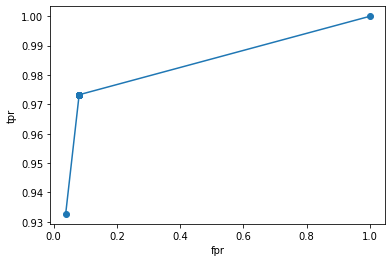

In [ ]:
threshold = np.arange(0,11)*0.1
batch_tpr = []
batch_fpr = []

for i in threshold:
  # print(i)
  test_pred_batch = testing(test_images_35_hw3,weights_batch,i)
  cf = ConfusionMatrix(test_labels_35,test_pred_batch)
  batch_tpr.append(cf[0][0]/np.sum(cf,axis=1)[0])
  batch_fpr.append(cf[1][0]/np.sum(cf,axis=1)[1])
  
print(batch_fpr,batch_tpr)
plt.scatter(batch_fpr,batch_tpr)
plt.plot(batch_fpr,batch_tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()
plt.show()
